## 1. Introduction



In [31]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train['FamilySize'] = train.SibSp + train.Parch
test['FamilySize'] = test.SibSp + test.Parch;
# Get Title from Name
train['Title'] = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train['Title'])
print('Titles: ', train.Title.nunique())
print(train.Title.value_counts())

Titles:  17
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Jonkheer          1
the Countess      1
Sir               1
Lady              1
Mme               1
Ms                1
Don               1
Capt              1
Name: Title, dtype: int64


In [4]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt','Col','Don',
                                         'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
print(train.Title.value_counts())

test['Title'] = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test['Title'])
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt','Col','Don',
                                         'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

Mr        517
Miss      182
Mrs       125
Master     40
Rare       23
Mlle        2
Ms          1
Mme         1
Name: Title, dtype: int64


      Sex  Survived
0  female  0.742038
1    male  0.188908


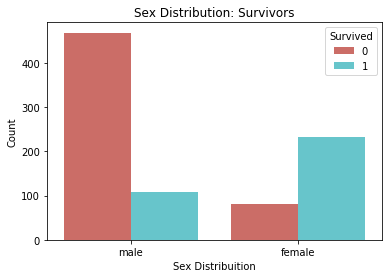

In [5]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
sns.countplot(x="Sex", data=train, hue="Survived", palette="hls")
plt.title('Sex Distribution: Survivors')
plt.xlabel('Sex Distribuition')
plt.ylabel('Count')
plt.show()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


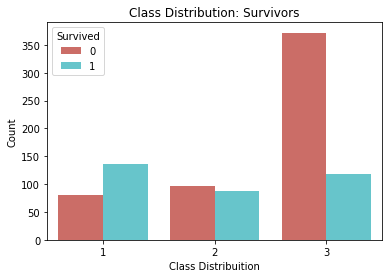

In [6]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
sns.countplot(x="Pclass", data=train, hue="Survived", palette="hls")
plt.title('Class Distribution: Survivors')
plt.xlabel('Class Distribuition')
plt.ylabel('Count')
plt.show()

   FamilySize  Survived
0           0  0.303538
1           1  0.552795
2           2  0.578431
3           3  0.724138
4           4  0.200000
5           5  0.136364
6           6  0.333333
7           7  0.000000
8          10  0.000000


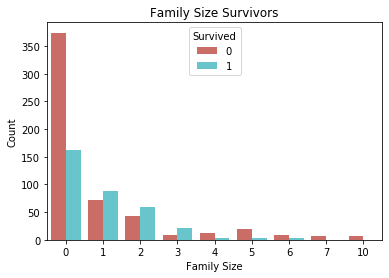

In [7]:
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
sns.countplot(x="FamilySize", data=train, hue="Survived", palette="hls")
plt.title('Family Size Survivors')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]


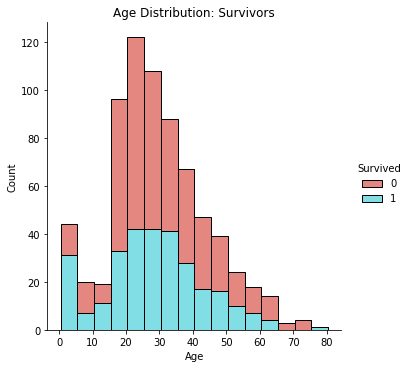

In [8]:
print (train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean())
sns.displot(data=train, x="Age", hue="Survived", kind="hist", binwidth = 5, multiple = "stack", palette="hls");
plt.title('Age Distribution: Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


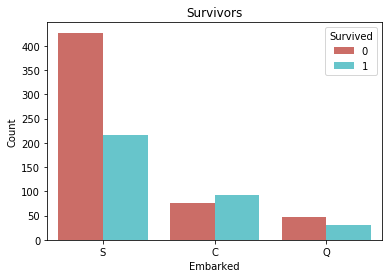

In [9]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
sns.countplot(x="Embarked", data=train, hue="Survived", palette="hls")
plt.title('Survivors')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2    Mlle  1.000000
3     Mme  1.000000
4      Mr  0.156673
5     Mrs  0.792000
6      Ms  1.000000
7    Rare  0.347826


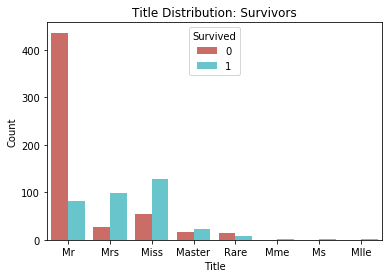

In [10]:
print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
sns.countplot(data=train, x="Title", hue="Survived", palette="hls");
plt.title('Title Distribution: Survivors')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

In [11]:
cols = ['Sex', 'Pclass', 'Embarked', 'Title', 'Survived', 'Age', 'FamilySize']
df = train[cols].dropna()
for col in cols[:-3]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df

,Survived,Age,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,0,22.0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,38.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,1,35.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,35.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
886,0,27.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
889,1,26.0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [12]:
col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

In [13]:
cols = ['Sex', 'Pclass', 'Embarked', 'Title', 'Age', 'FamilySize']
dft = train[cols].dropna()
for col in cols[:-2]:
    dft = pd.get_dummies(dft, columns=[col], prefix = [col])
    
col_length = len(dft.columns)
X_test = dft.iloc[:, 0:col_length]

In [14]:
scaler = StandardScaler()
scaler.fit_transform(X, y)
scaler.transform(X_test);

In [15]:
logreg = LogisticRegression()
lr_model = logreg.fit(X, y)
lrpredictions = lr_model.predict(X) 
print(classification_report(y, lrpredictions)) 
acc_log = round(logreg.score(X, y) * 100, 2)
print('Accuracy:', round(acc_log,2,), "%")

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       424
           1       0.81      0.77      0.79       288

    accuracy                           0.83       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.83      0.83      0.83       712

Accuracy: 83.43 %


In [16]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn.fit(X, y)
knn_predictions = knn_model.predict(X)
print(classification_report(y, knn_predictions)) 
acc_knn = round(knn.score(X, y) * 100, 2)
print('Accuracy:', round(acc_knn,2,), "%")

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       424
           1       0.84      0.80      0.82       288

    accuracy                           0.86       712
   macro avg       0.85      0.85      0.85       712
weighted avg       0.86      0.86      0.86       712

Accuracy: 85.67 %


In [17]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X, y) 
dt_predictions = dt.predict(X) 
print(classification_report(y, dt_predictions)) 
acc_dt = round(dt.score(X, y) * 100, 2)
print('Accuracy:', round(acc_dt,2,), "%")
dt_model.get_depth()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       424
           1       0.97      0.90      0.93       288

    accuracy                           0.95       712
   macro avg       0.95      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712

Accuracy: 94.8 %


16

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(dt_model, X, y, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.77622378 0.71328671 0.76760563 0.76760563 0.83098592]
Baseline: 77.11% (3.74%)


In [30]:
forest = RandomForestClassifier(random_state = 1)
rf_model = forest.fit(X, y)
rf_predictions = rf_model.predict(X)
print(classification_report(y, rf_predictions)) 
acc_rf = round(forest.score(X, y) * 100, 2)
print('Accuracy:', round(acc_rf,2,), "%")


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       424
           1       0.95      0.92      0.93       288

    accuracy                           0.95       712
   macro avg       0.95      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712

Accuracy: 94.8 %


In [22]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.78321678 0.71328671 0.78873239 0.77464789 0.8028169 ]
Baseline: 77.25% (3.10%)


In [33]:
gb= GradientBoostingClassifier(random_state=0)
gb_model = gb.fit(X, y)
gb_predictions = gb_model.predict(X)
print(classification_report(y, gb_predictions)) 
acc_gb = round(gb.score(X, y) * 100, 2)
print('Accuracy:', round(acc_gb ,2,), "%")

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       424
           1       0.82      0.81      0.81       288

    accuracy                           0.85       712
   macro avg       0.84      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712

Accuracy: 84.97 %
